In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
df

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,46,5.1,3.8,1.6,0.2,Iris-setosa
1,112,6.8,3.0,5.5,2.1,Iris-virginica
2,36,5.5,3.5,1.3,0.2,Iris-setosa
3,23,5.1,3.3,1.7,0.5,Iris-setosa
4,35,5.0,3.2,1.2,0.2,Iris-setosa
...,...,...,...,...,...,...
100,67,5.8,2.7,4.1,1.0,Iris-versicolor
101,66,5.6,3.0,4.5,1.5,Iris-versicolor
102,49,5.0,3.3,1.4,0.2,Iris-setosa
103,37,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     105 non-null    int64  
 1   SepalLengthCm  105 non-null    float64
 2   SepalWidthCm   105 non-null    float64
 3   PetalLengthCm  105 non-null    float64
 4   PetalWidthCm   105 non-null    float64
 5   Species        105 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


In [6]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')

Unnamed: 0: 105
SepalLengthCm: 29
SepalWidthCm: 20
PetalLengthCm: 37
PetalWidthCm: 22
Species: 3


# MLBox

In [7]:
paths = ["../data/train.csv","../data/test.csv"]
target_name = "Survived"

In [8]:
from mlbox.preprocessing import Reader, Drift_thresholder
from mlbox.optimisation import Optimiser
from mlbox.prediction import Predictor

In [9]:
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name) 


reading csv : train.csv ...
cleaning data ...
CPU time: 17.699272394180298 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 14.05177903175354 seconds


ValueError: You have no train dataset. Please check that the target name is correct.

In [ ]:
df

In [9]:
dft = Drift_thresholder()

In [10]:
df = dft.fit_transform(df)


computing drifts ...
CPU time: 0.1030280590057373 seconds

> Top 10 drifts

('PassengerId', 1.0)
('Name', 0.99408885871655)
('Ticket', 0.6915812665455325)
('Cabin', 0.19101400836012727)
('Embarked', 0.07669474108509045)
('SibSp', 0.042687046335085466)
('Fare', 0.034880025978640816)
('Sex', 0.03388834873866409)
('Pclass', 0.02764287951151667)
('Parch', 0.019840186517769975)

> Deleted variables : ['Name', 'PassengerId', 'Ticket']
> Drift coefficients dumped into directory : save


In [11]:
opt = Optimiser(scoring = "accuracy", n_folds = 5)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/optimisation/optimiser.py:78: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [12]:
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM", 'randomforest']},    
        'est__n_estimators':{"search":"choice",
                                  "space":[150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__max_depth':{"search":"choice",
                                  "randomforest__space":[5,6,7,8,9]},
        'est__learning_rate':{"search":"choice",
                                  "space":[0.07]} 
    
        }

In [13]:
params = opt.optimise(space, df,15)

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003254 seconds
INFO:hyperopt.tpe:TPE using 0 trials


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}        
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8187862205662901, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9362959055088744, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.814843213334908             
VARIANCE : 0.01747053018780567 (fold 1 = 0.8212290502793296, fold 2 = 0.8044692737430168, fold 3 = 0.8258426966292135, fold 4 = 0.7865168539325843, fold 5 = 0.8361581920903954)
CPU time: 0.7901811599731445 seconds                  
  7%|▋         | 1/15 [00:00<00:11,  1.24trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003996 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.814843


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}                                  
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8443317059093017, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8905880527545013, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  7%|▋         | 1/15 [00:00<00:11,  1.24trial/s, best lo

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  7%|▋         | 1/15 [00:01<00:11,  1.24trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
  7%|▋         | 1/15 [00:01<00:11,  1.24trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8148430714802217                                      
VARIANCE : 0.02075362738190645 (fold 1 = 0.8100558659217877, fold 2 = 0.8044692737430168, fold 3 = 0.848314606741573, fold 4 = 0.7865168539325843, fold 5 = 0.8248587570621468)
CPU time: 0.8498899936676025 seconds                                            
 13%|█▎        | 2/15 [00:01<00:10,  1.19trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002916 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.814843


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}                                  
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8704466910183452, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8952209495720231, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 13%|█▎        | 2/15 [00:01<00:10,  1.19trial/s, best lo

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 13%|█▎        | 2/15 [00:01<00:10,  1.19trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 13%|█▎        | 2/15 [00:02<00:10,  1.19trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 13%|█▎        | 2/15 [00:02<00:10,  1.19trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 13%|█▎        | 2/15 [00:02<00:10,  1.19trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8148430714802217                                      
VARIANCE : 0.02075362738190645 (fold 1 = 0.8100558659217877, fold 2 = 0.8044692737430168, fold 3 = 0.848314606741573, fold 4 = 0.7865168539325843, fold 5 = 0.8248587570621468)
CPU time: 1.0389518737792969 seconds                                            
 20%|██        | 3/15 [00:02<00:11,  1.07trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004059 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.814843


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}                                  
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8766236804287101, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.931657547186953, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 20%|██        | 3/15 [00:02<00:11,  1.07trial/s, best los

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 20%|██        | 3/15 [00:03<00:11,  1.07trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 20%|██        | 3/15 [00:03<00:11,  1.07trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8148430714802217                                      
VARIANCE : 0.02075362738190645 (fold 1 = 0.8100558659217877, fold 2 = 0.8044692737430168, fold 3 = 0.848314606741573, fold 4 = 0.7865168539325843, fold 5 = 0.8248587570621468)
CPU time: 1.0379388332366943 seconds                                            
 27%|██▋       | 4/15 [00:03<00:10,  1.02trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003681 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.814843


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}                                  
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8158351748496357, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8779993765427093, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 27%|██▋       | 4/15 [00:03<00:10,  1.02trial/s, best lo

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 27%|██▋       | 4/15 [00:04<00:10,  1.02trial/s, best loss: -0.814843213334908]


/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame)

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 27%|██▋       | 4/15 [00:04<00:10,  1.02trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8148116152035596                                      
VARIANCE : 0.011807898983964 (fold 1 = 0.8212290502793296, fold 2 = 0.8156424581005587, fold 3 = 0.8258426966292135, fold 4 = 0.7921348314606742, fold 5 = 0.8192090395480226)
CPU time: 0.7619078159332275 seconds                                            
 33%|███▎      | 5/15 [00:04<00:09,  1.10trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004714 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.814843


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}                                  
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8144111715643617, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8472055864537567, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 33%|███▎      | 5/15 [00:04<00:09,  1.10trial/s, best lo

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 33%|███▎      | 5/15 [00:04<00:09,  1.10trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarni

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 33%|███▎      | 5/15 [00:05<00:09,  1.10trial/s, best loss: -0.814843213334908]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8159792920529103                                      
VARIANCE : 0.02074901968324605 (fold 1 = 0.8100558659217877, fold 2 = 0.7988826815642458, fold 3 = 0.848314606741573, fold 4 = 0.7921348314606742, fold 5 = 0.8305084745762712)
CPU time: 0.9047231674194336 seconds                                            
 40%|████      | 6/15 [00:05<00:08,  1.09trial/s, best loss: -0.8159792920529103]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004130 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.815979


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'} 
>>> CA ENCODER :{'strategy': 'label_encoding'}                                   
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9080997728209081, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8592383723070203, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 40%|████      | 6/15 [00:05<00:08,  1.09trial/s, best 

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 40%|████      | 6/15 [00:05<00:08,  1.09trial/s, best loss: -0.8159792920529103]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 40%|████      | 6/15 [00:05<00:08,  1.09trial/s, best loss: -0.8159792920529103]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
MEAN SCORE : accuracy = 0.8182013747846912                                       
VARIANCE : 0.019135867840133238 (fold 1 = 0.8100558659217877, fold 2 = 0.8212290502793296, fold 3 = 0.8426966292134831, fold 4 = 0.7865168539325843, fold 5 = 0.8305084745762712)
CPU time: 0.65419602394104 seconds                                               
 47%|████▋     | 7/15 [00:06<00:06,  1.20trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003571 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.818201


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'} 
>>> CA ENCODER :{'strategy': 'label_encoding'}                                   
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9324565415602264, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.908817326827058, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1,

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 47%|████▋     | 7/15 [00:06<00:06,  1.20trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
MEAN SCORE : accuracy = 0.814843213334908                                        
VARIANCE : 0.01747053018780567 (fold 1 = 0.8212290502793296, fold 2 = 0.8044692737430168, fold 3 = 0.8258426966292135, fold 4 = 0.7865168539325843, fold 5 = 0.8361581920903954)
CPU time: 0.6265993118286133 seconds                                             
 53%|█████▎    | 8/15 [00:06<00:05,  1.29trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'} 
>>> CA ENCODER :{'strategy': 'label_encoding'}                                   
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8922556062363467, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9168030687734096, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 53%|█████▎    | 8/15 [00:06<00:05,  1.29trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 53%|█████▎    | 8/15 [00:06<00:05,  1.29trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarni

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 53%|█████▎    | 8/15 [00:07<00:05,  1.29trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 53%|█████▎    | 8/15 [00:07<00:05,  1.29trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
MEAN SCORE : accuracy = 0.8159792920529103                                       
VARIANCE : 0.02074901968324605 (fold 1 = 0.8100558659217877, fold 2 = 0.7988826815642458, fold 3 = 0.848314606741573, fold 4 = 0.7921348314606742, fold 5 = 0.8305084745762712)
CPU time: 1.0290162563323975 seconds                                             
 60%|██████    | 9/15 [00:07<00:05,  1.16trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'} 
>>> CA ENCODER :{'strategy': 'label_encoding'}                                   
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.925298601208494, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8562983669895226, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1,

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 60%|██████    | 9/15 [00:08<00:05,  1.16trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 60%|██████    | 9/15 [00:08<00:05,  1.16trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.814843213334908                                        
VARIANCE : 0.01747053018780567 (fold 1 = 0.8212290502793296, fold 2 = 0.8044692737430168, fold 3 = 0.8258426966292135, fold 4 = 0.7865168539325843, fold 5 = 0.8361581920903954)
CPU time: 1.0051310062408447 seconds                                             
 67%|██████▋   | 10/15 [00:08<00:04,  1.10trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003256 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.818201


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}  
>>> CA ENCODER :{'strategy': 'label_encoding'}                                    
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8009563712248968, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8333138566172695, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 67%|██████▋   | 10/15 [00:08<00:04,  1.10trial/s, be

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 67%|██████▋   | 10/15 [00:09<00:04,  1.10trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 67%|██████▋   | 10/15 [00:09<00:04,  1.10trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 67%|██████▋   | 10/15 [00:09<00:04,  1.10trial/s, best loss: -0.8182013747846912]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarni

MEAN SCORE : accuracy = 0.8193502204244506                                        
VARIANCE : 0.022470559732411986 (fold 1 = 0.7932960893854749, fold 2 = 0.8268156424581006, fold 3 = 0.8426966292134831, fold 4 = 0.7921348314606742, fold 5 = 0.8418079096045198)
CPU time: 0.9897983074188232 seconds                                              
 73%|███████▎  | 11/15 [00:09<00:03,  1.07trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003019 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.819350


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}  
>>> CA ENCODER :{'strategy': 'label_encoding'}                                    
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8578203357209784, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8690771420082455, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 73%|███████▎  | 11/15 [00:10<00:03,  1.07trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
MEAN SCORE : accuracy = 0.8148116152035596                                        
VARIANCE : 0.011807898983964 (fold 1 = 0.8212290502793296, fold 2 = 0.8156424581005587, fold 3 = 0.8258426966292135, fold 4 = 0.7921348314606742, fold 5 = 0.8192090395480226)
CPU time: 0.6293270587921143 seconds                                              
 80%|████████  | 12/15 [00:10<00:02,  1.18trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}  
>>> CA ENCODER :{'strategy': 'label_encoding'}                                    
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8425893204332089, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8848687281360319, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 80%|████████  | 12/15 [00:10<00:02,  1.18trial/s, be

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 80%|████████  | 12/15 [00:10<00:02,  1.18trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 80%|████████  | 12/15 [00:10<00:02,  1.18trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 80%|████████  | 12/15 [00:10<00:02,  1.18trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 80%|████████  | 12/15 [00:11<00:02,  1.18trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8182013747846912                                        
VARIANCE : 0.019135867840133238 (fold 1 = 0.8100558659217877, fold 2 = 0.8212290502793296, fold 3 = 0.8426966292134831, fold 4 = 0.7865168539325843, fold 5 = 0.8305084745762712)
CPU time: 0.5771770477294922 seconds                                              
 87%|████████▋ | 13/15 [00:11<00:01,  1.30trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002571 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.819350


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}  
>>> CA ENCODER :{'strategy': 'label_encoding'}                                    
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8579334322842777, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.9494709433778236, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 87%|████████▋ | 13/15 [00:11<00:01,  1.30trial/s, be

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 87%|████████▋ | 13/15 [00:11<00:01,  1.30trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 87%|████████▋ | 13/15 [00:11<00:01,  1.30trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 87%|████████▋ | 13/15 [00:11<00:01,  1.30trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.8148430714802217                                        
VARIANCE : 0.02075362738190645 (fold 1 = 0.8100558659217877, fold 2 = 0.8044692737430168, fold 3 = 0.848314606741573, fold 4 = 0.7865168539325843, fold 5 = 0.8248587570621468)
CPU time: 0.7158200740814209 seconds                                              
 93%|█████████▎| 14/15 [00:11<00:00,  1.32trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002060 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.819350


##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}  
>>> CA ENCODER :{'strategy': 'label_encoding'}                                    
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8594554406434826, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8642218298737046, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 93%|█████████▎| 14/15 [00:11<00:00,  1.32trial/s, be

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 93%|█████████▎| 14/15 [00:12<00:00,  1.32trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 93%|█████████▎| 14/15 [00:12<00:00,  1.32trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
 93%|█████████▎| 14/15 [00:12<00:00,  1.32trial/s, best loss: -0.8193502204244506]

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) 

MEAN SCORE : accuracy = 0.814843213334908                                         
VARIANCE : 0.01747053018780567 (fold 1 = 0.8212290502793296, fold 2 = 0.8044692737430168, fold 3 = 0.8258426966292135, fold 4 = 0.7865168539325843, fold 5 = 0.8361581920903954)
CPU time: 0.674036979675293 seconds                                               
100%|██████████| 15/15 [00:12<00:00,  1.20trial/s, best loss: -0.8193502204244506]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'est__colsample_bytree': 0.8009563712248968, 'est__learning_rate': 0.07, 'est__max_depth': 8, 'est__n_estimators': 150, 'est__strategy': 'LightGBM', 'est__s

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:323: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and



In [14]:
params

{'est__colsample_bytree': 0.8009563712248968,
 'est__learning_rate': 0.07,
 'est__max_depth': 8,
 'est__n_estimators': 150,
 'est__strategy': 'LightGBM',
 'est__subsample': 0.8333138566172695}

/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:197: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df_train) != pd.SparseDataFrame) and



fitting the pipeline ...
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
CPU time: 0.10343766212463379 seconds


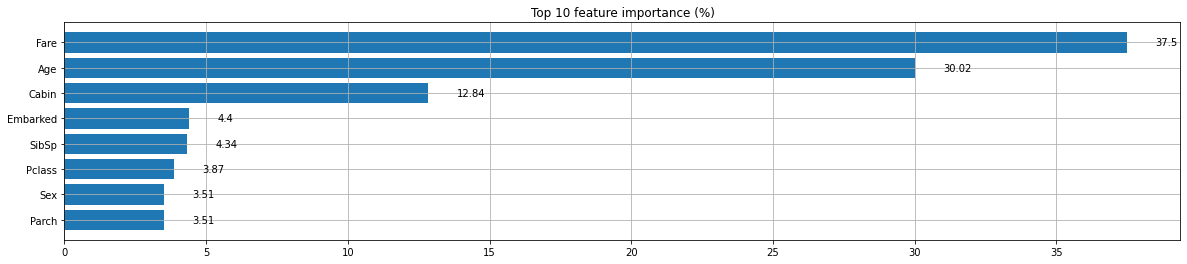


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.026813030242919922 seconds

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.962497  0.037503                   0
1  0.791343  0.208657                   0
2  0.860249  0.139751                   0
3  0.695483  0.304517                   0
4  0.639727  0.360273                   0
5  0.842950  0.157050                   0
6  0.487304  0.512696                   1
7  0.941219  0.058781                   0
8  0.135358  0.864642                   1
9  0.983676  0.016324                   0

dumping predictions into directory : save ...


/Users/nielshoogeveen/Desktop/Projects/auto-autoML/venv/lib/python3.7/site-packages/mlbox/model/supervised/classification/classifier.py:389: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if((type(df) != pd.SparseDataFrame) and


In [15]:
prd = Predictor()
prd.fit_predict(params, df)

# Tpot

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd


class DTypeSelector(BaseEstimator, TransformerMixin):
    """
    This transformer selects columns based on their datatype.
    Selecting columns of a certain datatype is useful in a pipeline where one wants to apply
    different transformers (e.g. different imputation techniques) for different datatypes.
    """

    def __init__(self, dtypes):
        self.dtypes = dtypes

    def fit(self, X, y=None):
        """
        The fit method of an DTypeSelector object simply returns self and validates whether X is an instance of a dataframe.
        :param X: X dataframe
        :param y: y series
        :return: self
        """
        self._validate_X(X)
        return self

    def transform(self, X):
        """
        This method will select and return only the columns with the specified datatype.
        :param X: X dataframe
        :return: X dataframe with columns of a specific datatype
        """
        return X.select_dtypes(self.dtypes)

    @staticmethod
    def _validate_X(X):
        """
        This static method validates whether X is a Pandas dataframe.
        :param X: X dataframe
        """
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X should be a dataframe.")


In [178]:
class Preprocess(TransformerMixin, BaseEstimator):
    
    def fit(self, X, y=None):
        
        self.pipeline = make_pipeline(
            make_union(
                make_pipeline(
                    DTypeSelector('number'),
                    SimpleImputer()
                ),
                make_pipeline(
                    DTypeSelector('object'),
                    SimpleImputer(strategy='most_frequent'),
                    OneHotEncoder(handle_unknown='ignore')
                )
            )
        )
        self.pipeline.fit(X)
        
        return self
    
    
    def transform(self, X):
        X = X.copy()
        X = self.pipeline.transform(X)
        
        return X

In [179]:
df = pd.read_csv('../data/train.csv')
df_val = pd.read_csv('../data/test.csv')

In [180]:
from tpot import TPOTClassifier

In [181]:
tpot = TPOTClassifier(generations=5,verbosity=2)

In [182]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [183]:
X = X.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [185]:
preprocess = Preprocess()

In [186]:
preprocess.fit(X_train)

Preprocess()

In [189]:
X_train = preprocess.transform(X_train)

In [191]:
X_test = preprocess.transform(X_test)

In [202]:
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

In [203]:
tpot.fit(X_train, y_train)

Version 0.11.0 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.


[16:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

[16:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)